In [ ]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('/gdrive/MyDrive/cleaned_training_data_01.csv')
df['average_delay'] = df['carrier_delay'] + df['nas_delay'] + df['late_aircraft_delay']
X = df[['crs_arr_time','actual_elapsed_time','distance','year','month','day','weekday','average_delay']]
y = df['arr_delay']
reg = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('/gdrive/MyDrive/cleaned_training_data_01.csv')

In [4]:
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [5]:
df['sumDelays'] = df['carrier_delay'] + df['weather_delay'] + df['nas_delay']+ df['security_delay']+ df['late_aircraft_delay']

In [6]:
df['crs_dep_time'] = df['crs_arr_time'] - df['crs_elapsed_time']

In [7]:
def crs_dep(row):
  if row['crs_dep_time'] < 0:
    return 2400 + row['crs_dep_time']
  else:
    return row['crs_dep_time']

In [8]:
df['crs_dep_time'] = df.apply(crs_dep,axis=1)

In [9]:
df['crs_dep_time'] = df['crs_dep_time'].astype(float).astype(int).apply(lambda x: '{0:0>4}'.format(x)).astype(str)

In [10]:
df['Weekday'] = pd.to_datetime(df['fl_date']).dt.dayofweek

In [11]:
df['Season']= (pd.to_datetime(df['fl_date']).dt.month - 1) // 3

In [12]:
df

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,crs_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday,sumDelays,crs_dep_time,Weekday,Season
0,2018-10-02,WN,WN,ABQ,1117.0,-3.0,PHX,1135.0,-5.0,1140,78.0,80.0,328.0,0.0,0.0,0.0,0.0,0.0,2018,10,2,0.0,0.0,1060,1,3
1,2019-03-13,AA,YX,LGA,911.0,-9.0,BNA,1047.0,-18.0,1105,156.0,165.0,764.0,0.0,0.0,0.0,0.0,0.0,2019,3,13,0.0,0.0,0940,2,0
2,2019-03-19,AA,AA,HDN,1338.0,-5.0,DFW,1645.0,-10.0,1655,127.0,132.0,769.0,0.0,0.0,0.0,0.0,0.0,2019,3,19,0.0,0.0,1523,1,0
3,2018-04-18,DL,OO,IAH,610.0,-5.0,MSP,859.0,-11.0,910,169.0,175.0,1034.0,0.0,0.0,0.0,0.0,0.0,2018,4,18,0.0,0.0,0735,2,1
4,2018-04-06,DL,9E,SYR,1444.0,44.0,LGA,1625.0,73.0,1512,101.0,72.0,198.0,36.0,0.0,29.0,0.0,8.0,2018,4,6,0.0,73.0,1440,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979151,2018-11-16,AA,OO,PHX,1454.0,24.0,PSP,1458.0,18.0,1440,64.0,70.0,261.0,18.0,0.0,0.0,0.0,0.0,2018,11,16,0.0,18.0,1370,4,3
979152,2018-07-12,F9,F9,DEN,1625.0,50.0,TUL,1904.0,51.0,1813,99.0,98.0,541.0,0.0,0.0,1.0,0.0,50.0,2018,7,12,0.0,51.0,1715,3,2
979153,2018-01-11,AA,OO,DTW,1812.0,-4.0,ORD,1846.0,1.0,1845,94.0,89.0,235.0,0.0,0.0,0.0,0.0,0.0,2018,1,11,0.0,0.0,1756,3,0
979154,2019-02-09,AA,AA,ORD,1719.0,44.0,LAX,1946.0,40.0,1906,267.0,271.0,1744.0,40.0,0.0,0.0,0.0,0.0,2019,2,9,1.0,40.0,1635,5,0


In [13]:
df['dep_hour'] = df['crs_dep_time'].astype(str).str[:2].astype(int)

In [14]:
df['mean_origin_weekday'] = df.groupby(['origin','dest','Season','Weekday','op_unique_carrier','dep_hour'])['sumDelays'].transform('mean')

In [15]:
df = df.drop(['fl_date','mkt_unique_carrier','carrier_delay','dep_delay',	'actual_elapsed_time','weather_delay', 	'nas_delay', 	'security_delay', 'late_aircraft_delay'],axis=1)

In [16]:
testDF = df.drop(['crs_dep_time','distance','day','year','dep_time','arr_time','crs_arr_time','weekday'],axis=1)

In [17]:
testDF

,op_unique_carrier,origin,dest,arr_delay,crs_elapsed_time,month,sumDelays,Weekday,Season,dep_hour,mean_origin_weekday
0,WN,ABQ,PHX,-5.0,80.0,10,0.0,1,3,10,0.000000
1,YX,LGA,BNA,-18.0,165.0,3,0.0,2,0,9,0.000000
2,AA,HDN,DFW,-10.0,132.0,3,0.0,1,0,15,0.000000
3,OO,IAH,MSP,-11.0,175.0,4,0.0,2,1,7,0.000000
4,9E,SYR,LGA,73.0,72.0,4,73.0,4,1,14,73.000000
...,...,...,...,...,...,...,...,...,...,...,...
979151,OO,PHX,PSP,18.0,70.0,11,18.0,4,3,13,67.500000
979152,F9,DEN,TUL,51.0,98.0,7,51.0,3,2,17,45.500000
979153,OO,DTW,ORD,1.0,89.0,1,0.0,3,0,17,0.000000
979154,AA,ORD,LAX,40.0,271.0,2,40.0,5,0,16,13.333333


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
testDF['op_unique_carrier']= le.fit_transform(testDF['op_unique_carrier'])

In [19]:
testDF['origin']= le.fit_transform(testDF['origin'])

In [20]:
testDF['dest']= le.fit_transform(testDF['dest'])

In [21]:
testDF

,op_unique_carrier,origin,dest,arr_delay,crs_elapsed_time,month,sumDelays,Weekday,Season,dep_hour,mean_origin_weekday
0,21,2,246,-5.0,80.0,10,0.0,1,3,10,0.000000
1,23,187,41,-18.0,165.0,3,0.0,2,0,9,0.000000
2,1,139,87,-10.0,132.0,3,0.0,1,0,15,0.000000
3,16,153,222,-11.0,175.0,4,0.0,2,1,7,0.000000
4,0,316,186,73.0,72.0,4,73.0,4,1,14,73.000000
...,...,...,...,...,...,...,...,...,...,...,...
979151,16,247,258,18.0,70.0,11,18.0,4,3,13,67.500000
979152,9,86,321,51.0,98.0,7,51.0,3,2,17,45.500000
979153,16,94,235,1.0,89.0,1,0.0,3,0,17,0.000000
979154,1,236,178,40.0,271.0,2,40.0,5,0,16,13.333333


In [22]:
X,y = testDF.drop('arr_delay',axis=1),testDF['arr_delay']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
pca = PCA()
scaler = StandardScaler()
X=scaler.fit_transform(X)
pca.fit_transform(X)

array([[-1.72745701, -0.28765528, -1.12923279, ...,  0.07893969,
        -0.04177758, -0.22311721],
       [ 1.61006312, -0.91132771, -0.52460052, ...,  1.25469081,
        -0.04233047,  0.23541781],
       [ 1.64631204, -0.69492895,  0.08066412, ..., -0.32823261,
        -0.0673252 ,  0.2400073 ],
       ...,
       [ 2.05066281, -0.6763895 , -1.03465406, ..., -0.15344218,
        -0.07197634, -0.18409721],
       [ 2.0066795 ,  0.1789559 ,  2.07699472, ...,  0.21427285,
        -0.47956068,  0.01631816],
       [ 2.05331009, -0.79643812, -0.56635179, ...,  0.6844292 ,
        -0.06449714, -0.1768361 ]])

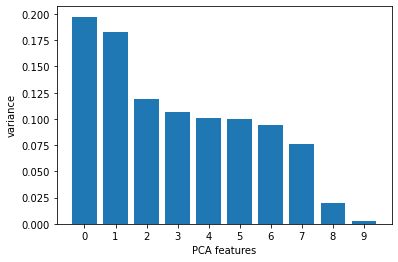

In [27]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [28]:
pca = PCA(n_components=8)
pca.fit(X)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV
import xgboost as xg

In [30]:
from sklearn.metrics import mean_squared_error

In [43]:
model = RandomForestRegressor(n_estimators=100,max_depth=4,random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.870115019380406

In [44]:
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 252.94779011144283
RSME: 15.904332432121848
r2 score: 0.870115019380406
Adjusted R2 value: 0.8701114819428087


In [45]:
model = GradientBoostingRegressor(n_estimators=150,learning_rate=1.5,random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [46]:
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 259.990780264155
RSME: 16.124229602190457
r2 score: 0.8664985472258718
Adjusted R2 value: 0.8664949112930944


In [35]:
import xgboost as xgb

In [48]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train,y_train)
y_pred = xgbr.predict(X_test)
xgbr.score(X_test,y_test)

0.8740873336592033

In [40]:
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 245.21180621510055
RSME: 15.659240282181653
r2 score: 0.8740873336592033
Adjusted R2 value: 0.8697878129286141
